In [3]:
# Ejemplo didáctico de Planificación Agregada
import pulp

# Problema de minimización de costos:
lp = pulp.LpProblem("planificacion_agregada", pulp.LpMinimize)

#====> SETS
t_set = list(range(1, 13))

#====> PARÁMETROS
# Demanda:
d = {1: 6000, 2: 5000, 3: 7000, 4: 9000, 5: 10000, 6: 22000,\
     7: 23000, 8: 7000, 9: 7000, 10: 6000, 11: 6000, 12: 6000}
alfa = 0.25 # Horas invertidas por unidad.
mu = 1 # Rendimiento productivo.
w_n_max = 160 # Horas normales disponibles por mes de producción.
w_e_max = 64 # Horas extras máximas por persona
b_0 = 0 # Backlog inicial.
b_max = 10 # Backlog máximo.
i_max = 500 # Inventario máximo.
i_0 = 300 # Inventario mínimo inicial (t=1)
c_p_n = 66 # Costo productivo en horas normales.
c_p_e = 74 # Costo productivo en horas extra.
c_b = 10 # Costo por backlog
c_q = 80 # Costo por tercerizar.
c_dot_c = 360 # Costo por contratar.
c_dot_l = 180 # Costo por despedir.
c_i = 1 # Costo por mantenimiento de inventario.
dot_min = 10 # Dotación mínima.
dot_max = 20 # Dotación máxima.
dot_0 = 10 # Dotación inicial.

#====> VARIABLES
P = pulp.LpVariable.dicts('P', t_set, 0, None, cat='Continuous') # Producción total
P_N = pulp.LpVariable.dicts('P_N', t_set, 0, None, cat='Continuous') # Producción normal
P_E = pulp.LpVariable.dicts('P_E', t_set, 0, None, cat='Continuous') # Producción extra
I = pulp.LpVariable.dicts('I', t_set, 0, None, cat='Continuous') # Inventario
B = pulp.LpVariable.dicts('B', t_set, 0, None, cat='Continuous') # Backlog
Q = pulp.LpVariable.dicts('Q', t_set, 0, None, cat='Continuous') # Tercerización
W_N = pulp.LpVariable.dicts('W_N', t_set, 0, None, cat='Continuous') # Manpower normal
W_E = pulp.LpVariable.dicts('W_E', t_set, 0, None, cat='Continuous') # Manpower extra
DOT = pulp.LpVariable.dicts('DOT', t_set, 0, None, cat='Continuous') # Personal total
DOT_C = pulp.LpVariable.dicts('DOT_C', t_set, 0, None, cat='Integer') # Personal contratado
DOT_L = pulp.LpVariable.dicts('DOT_L', t_set, 0, None, cat='Integer') # Personal despedido

#====> FUNCIÓN OBJETIVO
Z = [c_p_n*P_N[t] + c_p_e*P_E[t] + c_i*I[t] + c_b*B[t] +\
     c_dot_c*DOT_C[t] + c_dot_l*DOT_L[t] + c_q*Q[t] for t in t_set]
lp += pulp.lpSum(Z), 'Z'

#====> RESTRICCIONES

## 1) RESTRICCIONES DE PRODUCCIÓN:

### Balance productivo:
lp += mu*P[1] + i_0 + B[1] + Q[1] == d[1] + I[1] + b_0 # para t='1'
for t in t_set[1:]: lp += mu*P[t] + I[t-1] + B[t] + Q[t] == d[t] + I[t] + B[t-1] # para t=[2,12]
    
### Restricción que desagrega la producción en normal y extra:
for t in t_set: lp += P[t] == P_N[t] + P_E[t]
    
### Backlog máximo permitido:
for t in t_set: lp += B[t] <= b_max 

## 2) REQUERIMIENTOS DE PERSONAL:

### Producción de unidades por hora trabajada:
for t in t_set: lp += W_N[t] == alfa*P_N[t]
for t in t_set: lp += W_E[t] == alfa*P_E[t]
    
### Cota de horas laborales:
for t in t_set: lp += W_N[t] <= DOT[t]*w_n_max
for t in t_set: lp += W_E[t] <= DOT[t]*w_e_max
    
## Cotas de dotación:
for t in t_set: lp += DOT[t] >= dot_min
for t in t_set: lp += DOT[t] <= dot_max
    
### Balance de personal:
lp += DOT[1] == dot_0 + DOT_C[1] - DOT_L[1] # para t='1'
for t in t_set[1:]: lp += DOT[t] == DOT[t-1] + DOT_C[t] - DOT_L[t] # para t=[2,12]

## 3) COTAS EN NIVEL DE INVENTARIO:
for t in t_set: lp += I[t] <= i_max

#====> SOLUCIÓN
lp.solve()
print(pulp.LpStatus[lp.status])

for variable in lp.variables():
    print("%s = %.2f" % (variable.name, variable.varValue))
print(pulp.value(lp.objective))

Optimal
B_1 = 0.00
B_10 = 0.00
B_11 = 0.00
B_12 = 10.00
B_2 = 0.00
B_3 = 0.00
B_4 = 0.00
B_5 = 0.00
B_6 = 0.00
B_7 = 10.00
B_8 = 0.00
B_9 = 0.00
DOT_1 = 10.00
DOT_10 = 20.00
DOT_11 = 20.00
DOT_12 = 20.00
DOT_2 = 10.00
DOT_3 = 13.00
DOT_4 = 15.00
DOT_5 = 19.00
DOT_6 = 20.00
DOT_7 = 20.00
DOT_8 = 20.00
DOT_9 = 20.00
DOT_C_1 = 0.00
DOT_C_10 = 0.00
DOT_C_11 = 0.00
DOT_C_12 = 0.00
DOT_C_2 = 0.00
DOT_C_3 = 3.00
DOT_C_4 = 2.00
DOT_C_5 = 4.00
DOT_C_6 = 1.00
DOT_C_7 = 0.00
DOT_C_8 = 0.00
DOT_C_9 = 0.00
DOT_L_1 = 0.00
DOT_L_10 = 0.00
DOT_L_11 = 0.00
DOT_L_12 = 0.00
DOT_L_2 = 0.00
DOT_L_3 = 0.00
DOT_L_4 = 0.00
DOT_L_5 = 0.00
DOT_L_6 = 0.00
DOT_L_7 = 0.00
DOT_L_8 = 0.00
DOT_L_9 = 0.00
I_1 = 0.00
I_10 = 0.00
I_11 = 0.00
I_12 = 0.00
I_2 = 0.00
I_3 = 0.00
I_4 = 0.00
I_5 = 500.00
I_6 = 0.00
I_7 = 0.00
I_8 = 0.00
I_9 = 0.00
P_1 = 5700.00
P_10 = 6000.00
P_11 = 6000.00
P_12 = 5990.00
P_2 = 5000.00
P_3 = 7000.00
P_4 = 9000.00
P_5 = 10500.00
P_6 = 17920.00
P_7 = 17920.00
P_8 = 7010.00
P_9 = 7000.00
P_E_1 =

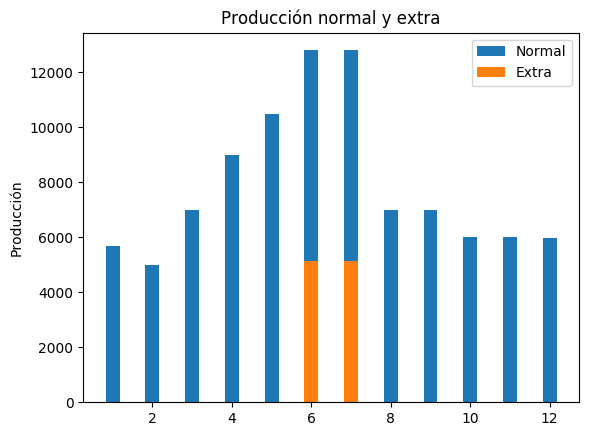

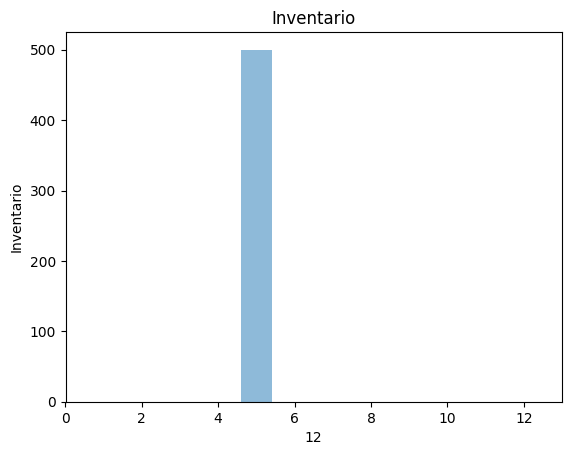

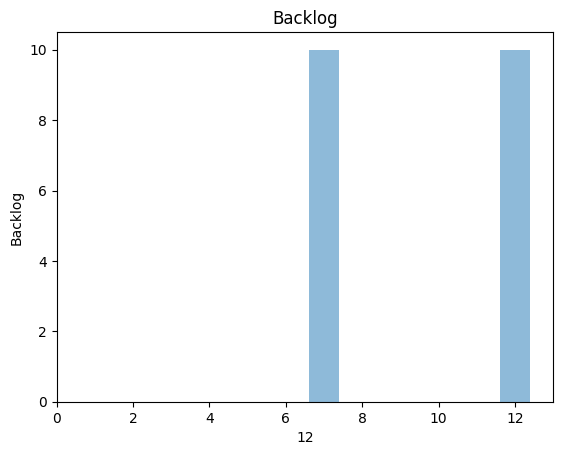

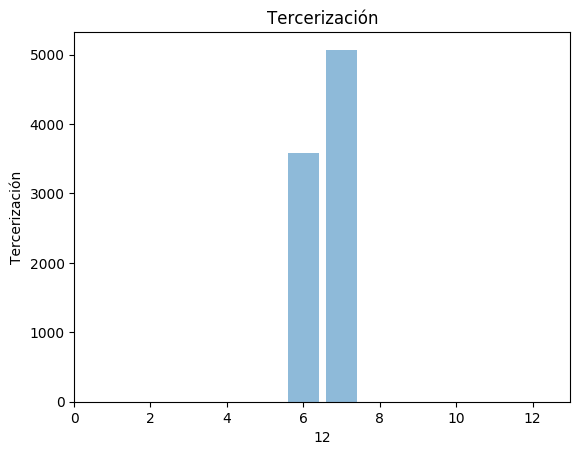

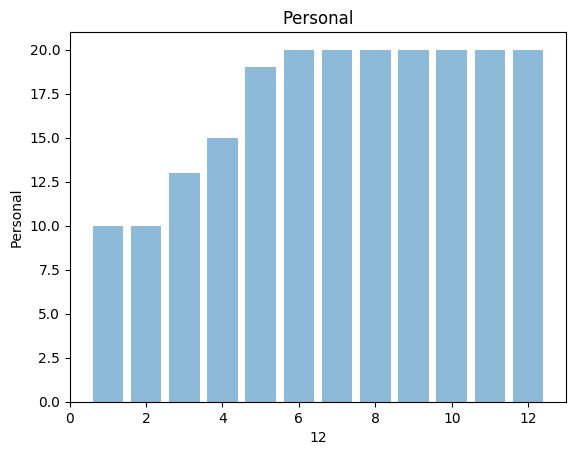

In [5]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

result_PN = [pn.varValue for pn in P_N.values()]
result_PE = [pe.varValue for pe in P_E.values()]
result_I = [i.varValue for i in I.values()]
result_B = [b.varValue for b in B.values()]
result_Q = [q.varValue for q in Q.values()]
result_DOT = [dot.varValue for dot in DOT.values()]

pn_chart = plt.bar(t_set, result_PN, 0.35)
pe_chart = plt.bar(t_set, result_PE, 0.35)
plt.ylabel('Producción')
plt.title('Producción normal y extra')
plt.legend((pn_chart[0], pe_chart[0]), ('Normal', 'Extra'))
plt.show()

plt.bar(t_set, result_I, align='center', alpha=0.5)
plt.xlabel('%s' % t)
plt.ylabel('%s' % 'Inventario')
plt.title('%s' % 'Inventario')
plt.show()

plt.bar(t_set, result_B, align='center', alpha=0.5)
plt.xlabel('%s' % t)
plt.ylabel('%s' % 'Backlog')
plt.title('%s' % 'Backlog')
plt.show()

plt.bar(t_set, result_Q, align='center', alpha=0.5)
plt.xlabel('%s' % t)
plt.ylabel('%s' % 'Tercerización')
plt.title('%s' % 'Tercerización')
plt.show()
           
plt.bar(t_set, result_DOT, align='center', alpha=0.5)
plt.xlabel('%s' % t)
plt.ylabel('%s' % 'Personal')
plt.title('%s' % 'Personal')
plt.show()